**Stellar Classification Dataset - SDSS17**


**Classification** of Stars, Galaxies and Quasars. Sloan Digital Sky Survey DR17

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,classification_report

In [2]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import Birch
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.naive_bayes import MultinomialNB

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/star_classification.csv')

In [ ]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

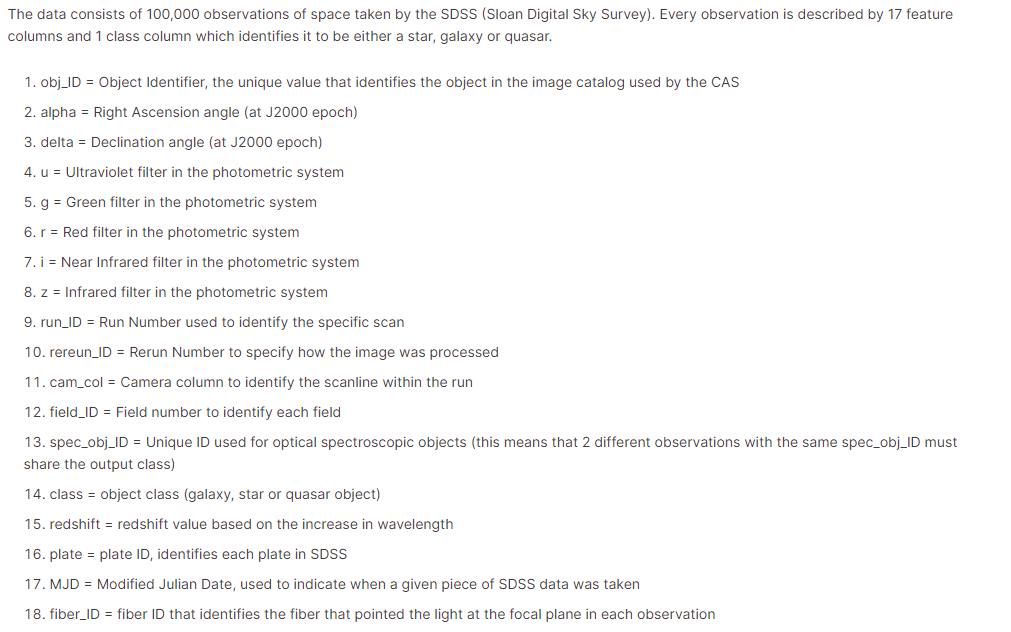

# **Data Preprocessing**

In [ ]:
df.shape

(100000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [ ]:
df.nunique()

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

In [ ]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

<ipython-input-11-a852c0e3332a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['class'], palette = 'ch:s=.25,rot=-.25')


<Axes: xlabel='class', ylabel='count'>

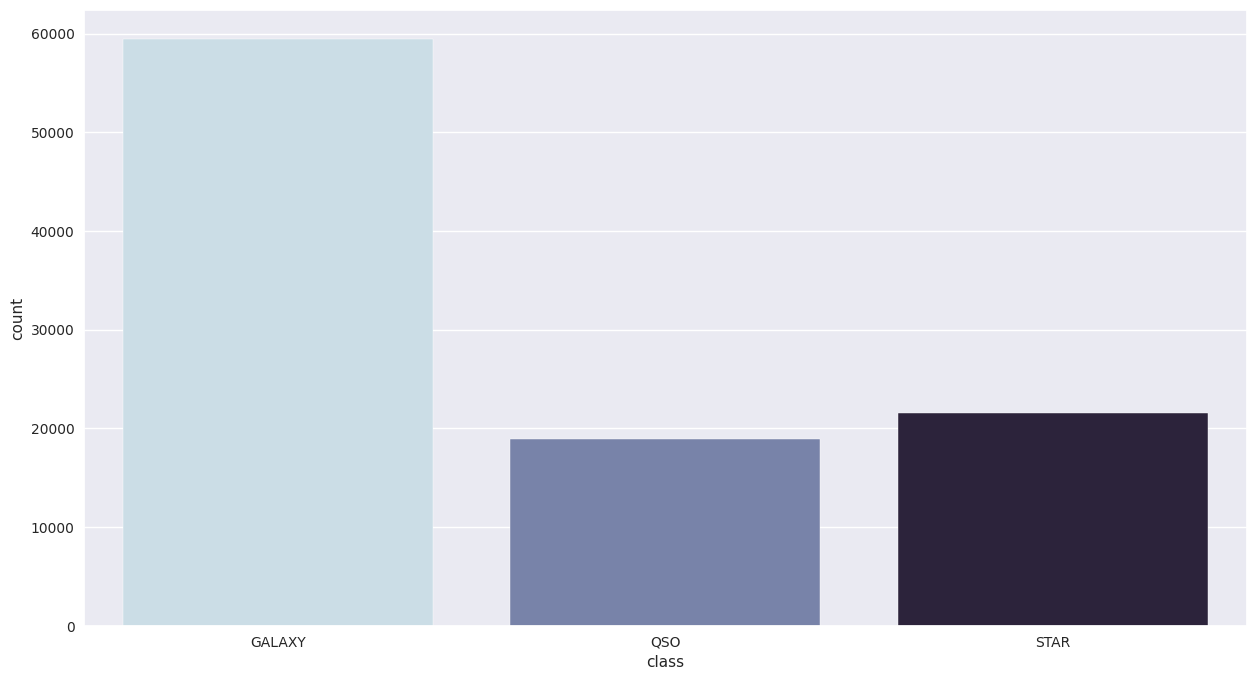

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x = df['class'], palette = 'ch:s=.25,rot=-.25')

In [ ]:
corr_matrix = df.corr()

<ipython-input-12-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

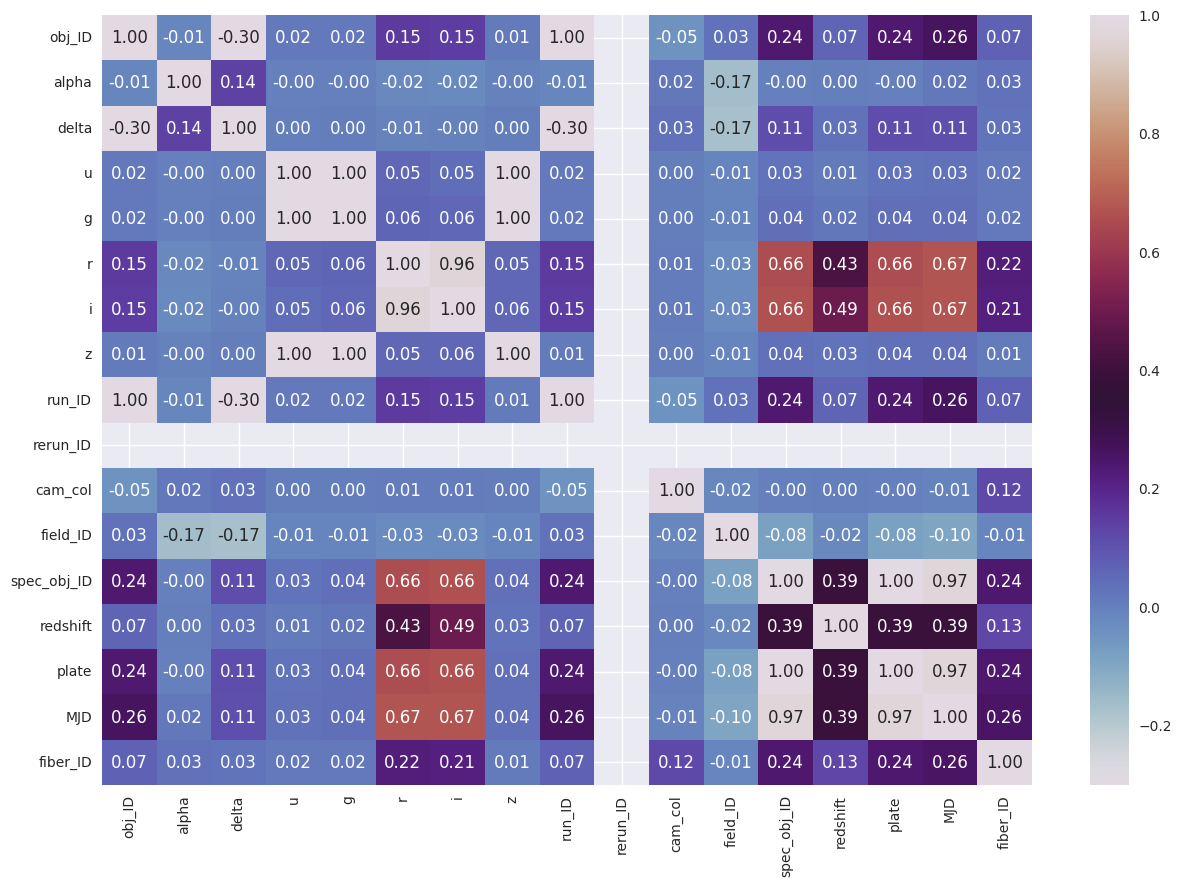

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, cmap='twilight')

In [ ]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

As we can see, the data has no missing values. Therefore we move on to check for outliers.

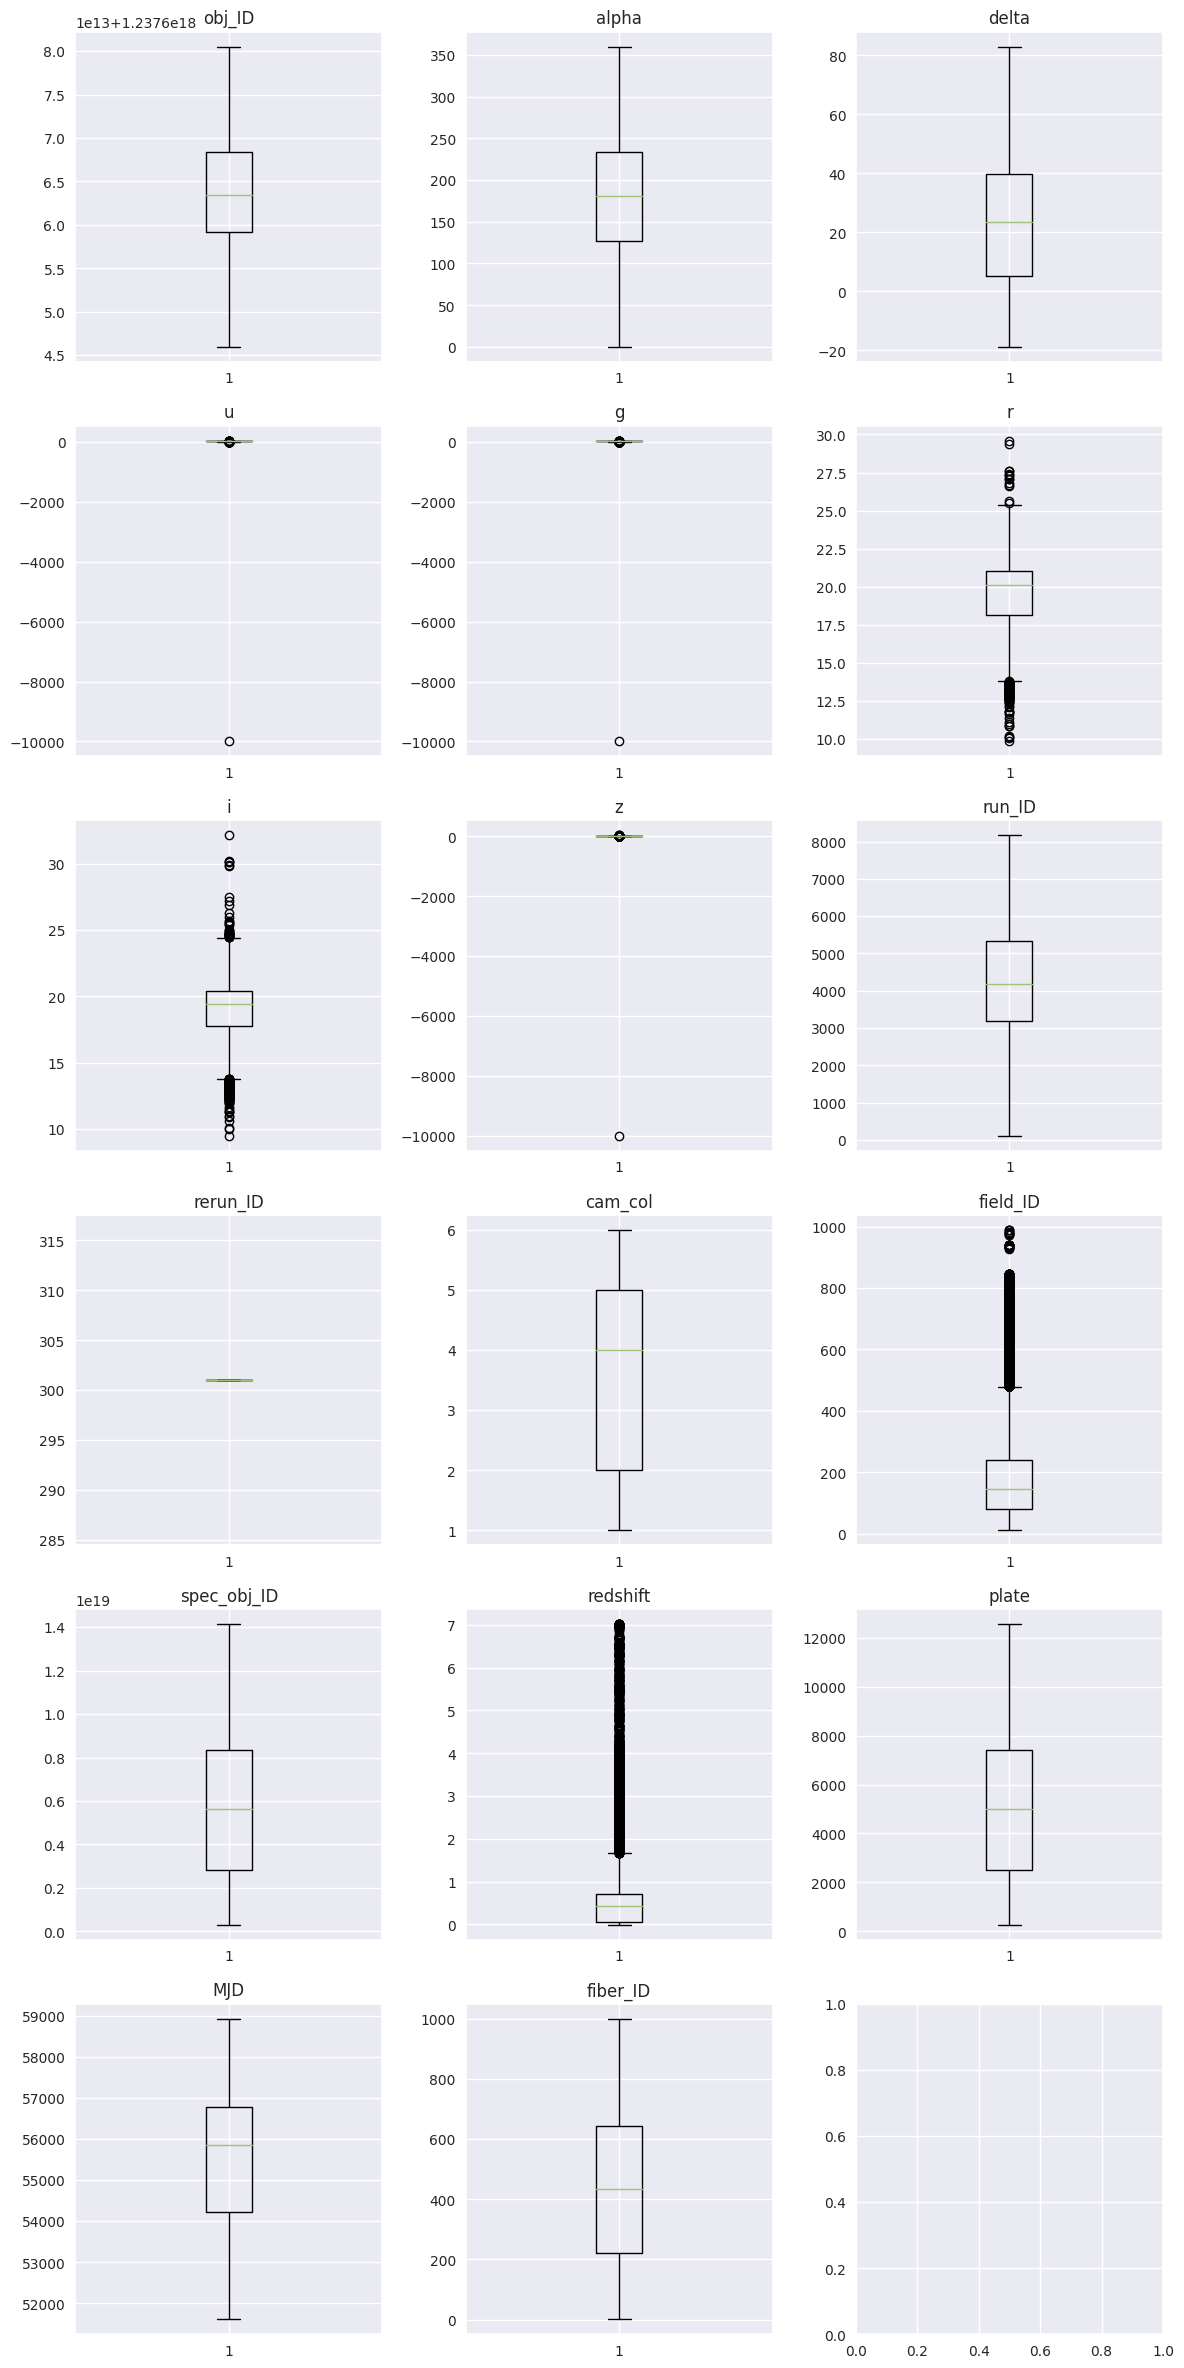

In [ ]:
#outliers detection
num_features = df.drop(columns = "class")
num_attributes = len(num_features.columns)
num_cols = 3
num_rows = -(-num_attributes // num_cols)

fig_width = 4 * num_cols
fig_height = 4 * num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

axes = axes.flatten()

for i, col in enumerate(num_features.columns):
    axes[i].boxplot(num_features[col])
    axes[i].set_title(col)

plt.tight_layout()

plt.show()

# **Data Visualization Pt.1**

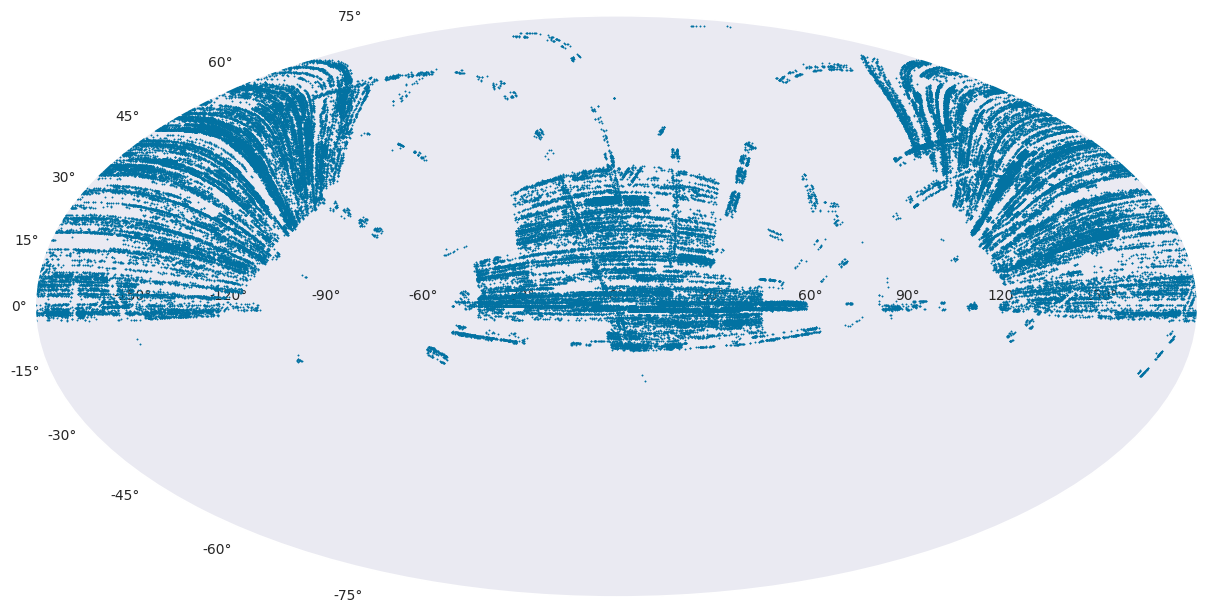

In [ ]:
#The positions of the objects can be plotted on a celestial sphere, allowing you to see the distribution of objects in the sky.

from astropy.coordinates import SkyCoord
import astropy.units as u
coords = SkyCoord(ra=df['alpha']*u.degree, dec=df['delta']*u.degree, frame='icrs')

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(coords.ra.wrap_at(180*u.degree).radian, coords.dec.radian, s=1)
ax.grid()
plt.show()

🎞️ Using Photometric filters

Using Photometric filters: CMDs(Color Magnitude Diagrams) plot the brightness of an object in one filter (magnitude) against its brightness in another filter (color). This can reveal information about the properties of the objects in the dataset, such as their temperature, metallicity, or age.

In [ ]:
import plotly.express as px
# Define colors
color = df['u'] - df['g']
# Define magnitude
mag = df['r']
# Plot CMD
fig = px.scatter(x=color, y=mag, color=color, opacity=0.5)
fig.update_layout(xaxis_title='u - g', yaxis_title='r')
fig.show()

🪐 The Redshift

Red shift is a key concept for astronomers. It is the wavelength of the light that is stretched, so the light is seen as 'shifted' towards the red part of the spectrum. A redshift histogram shows the distribution of objects at different redshift values, which can provide insights into the large-scale structure of the universe.

In [ ]:
import plotly.graph_objs as go
fig = go.Figure(data=go.Histogram(x=df['redshift'], nbinsx=50))

fig.update_layout(title='Redshift Distribution',
                  xaxis_title='Redshift',
                  yaxis_title='Number of Objects')
fig.show()

# **Label Encoding**

In [5]:
#Convert the string class to a number through label encoding.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# **Data Visualization Pt.2**

In [ ]:
#The kdeplot is a graph of the density of a numerical variable.
def plot(column):
    for i in range(3):
        sns.kdeplot(data=df[df["class"] == i][column], label = le.inverse_transform([i]))
    sns.kdeplot(data=df[column],label = ["All"])
    plt.legend();
def log_plot(column):
    for i in range(3):
        sns.kdeplot(data=np.log(df[df["class"] == i][column]), label = le.inverse_transform([i]), fill = True)
    sns.kdeplot(data=np.log(df[column]),label = ["All"], fill = True)
    plt.legend();

In [ ]:
print(df["rerun_ID"].nunique())
df = df.drop("rerun_ID",axis=1)
#Only one unique value does not help you train. Hence, this column is dropped.

1


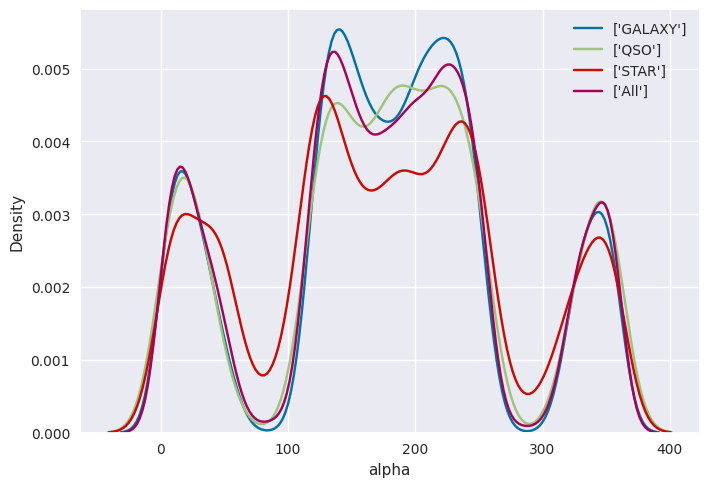

In [ ]:
#Right Ascension angle (at J2000 epoch)
plot("alpha")

There is not much difference in distribution according to class, but we can see that there are some characteristics to distinguish star class.

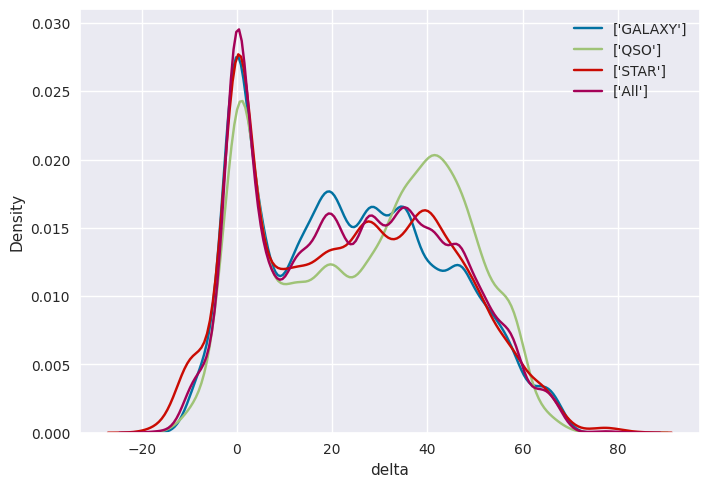

In [ ]:
#Declination angle (at J2000 epoch)
plot("delta")

Although there is no significant difference in distribution according to class, we can see that there are some characteristics to distinguish quasar class.

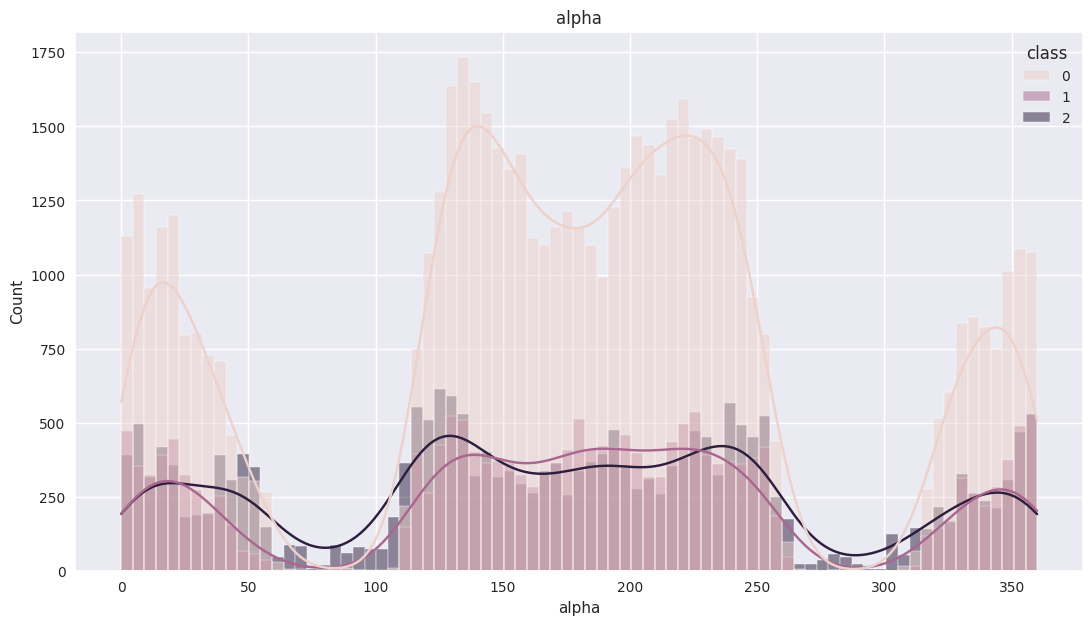

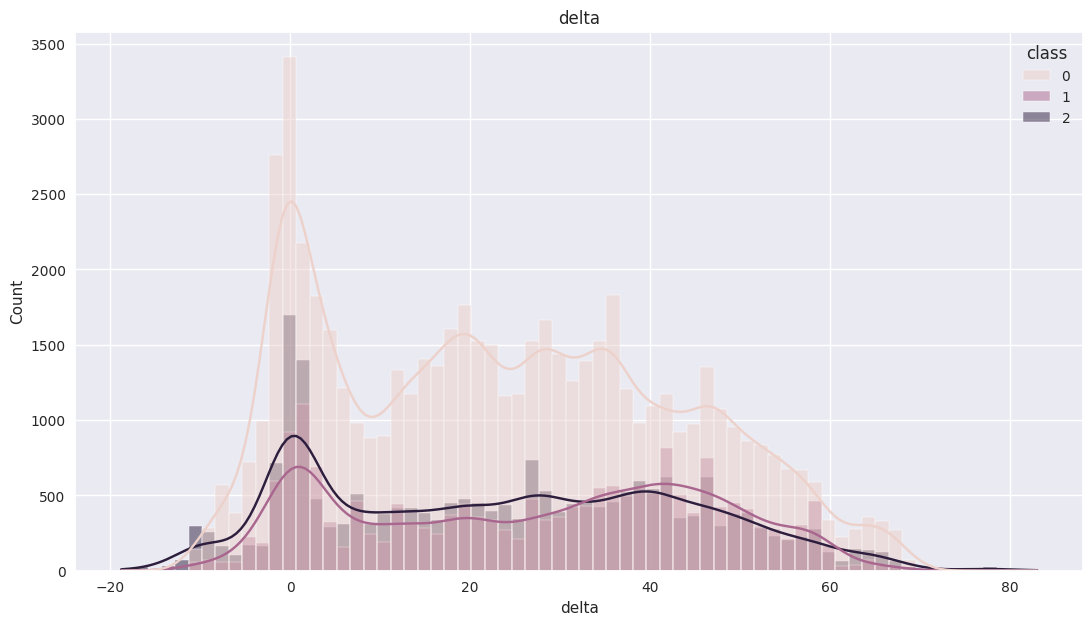

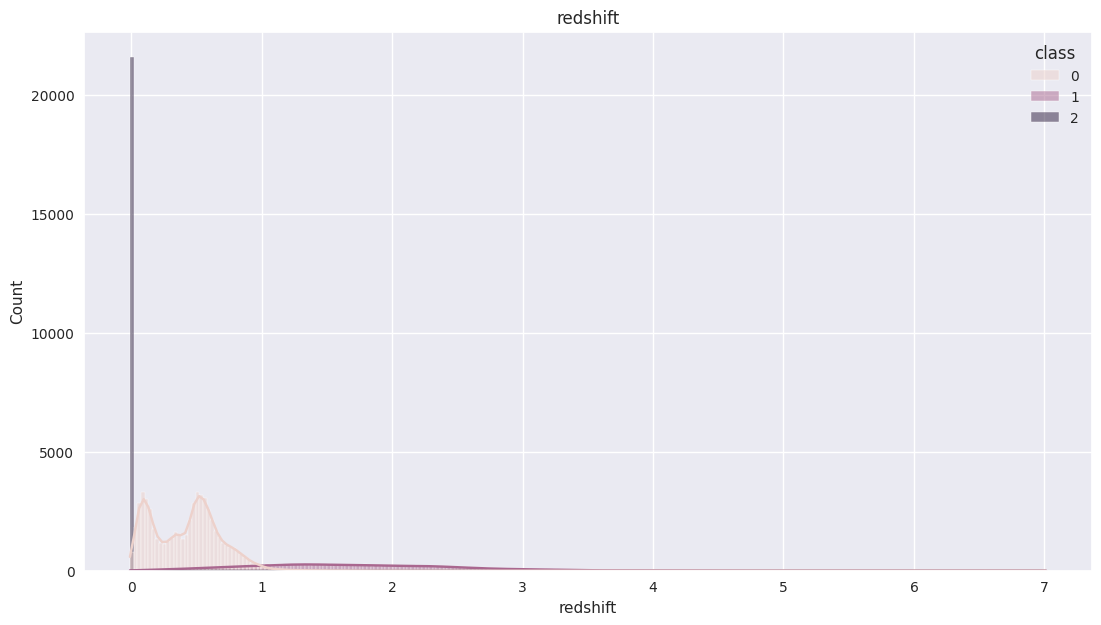

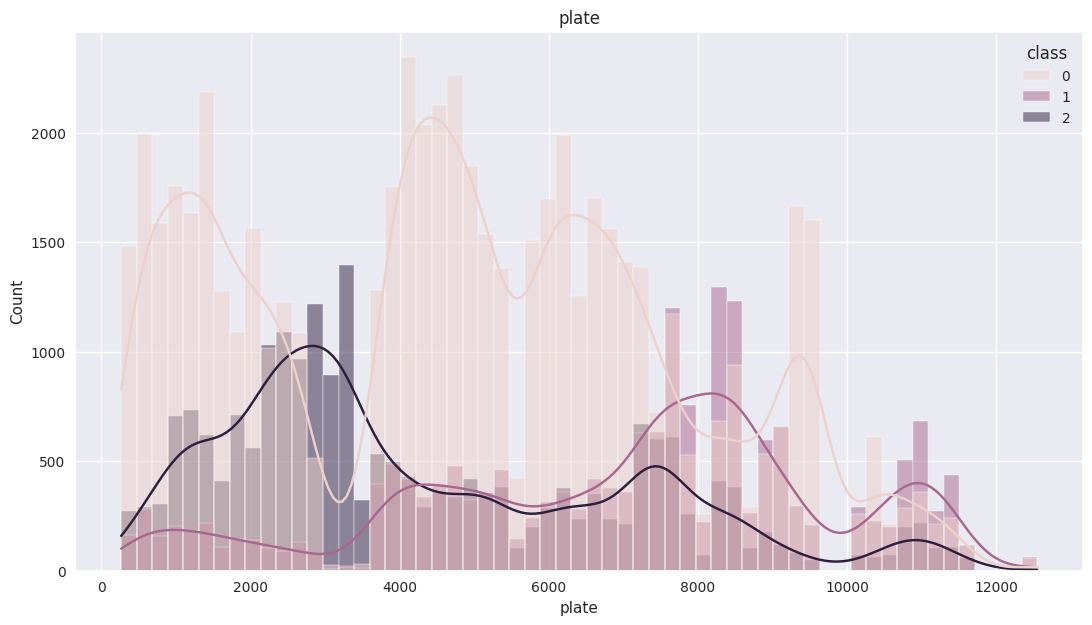

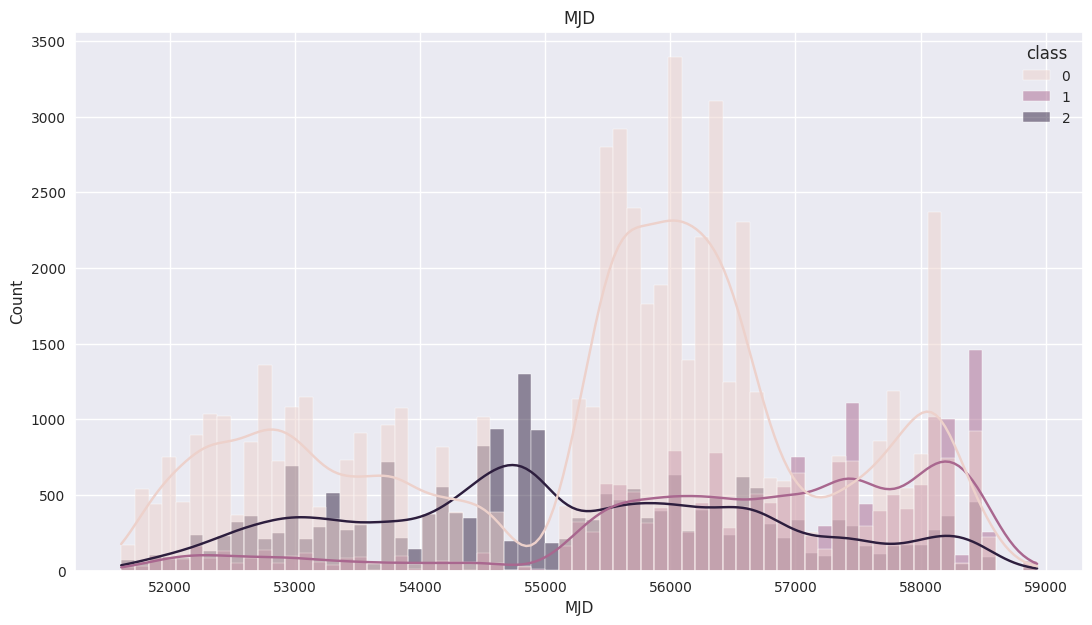

In [ ]:
for i in ['alpha', 'delta','redshift', 'plate', 'MJD']:
    plt.figure(figsize=(13,7))
    sns.histplot(data=df, x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log



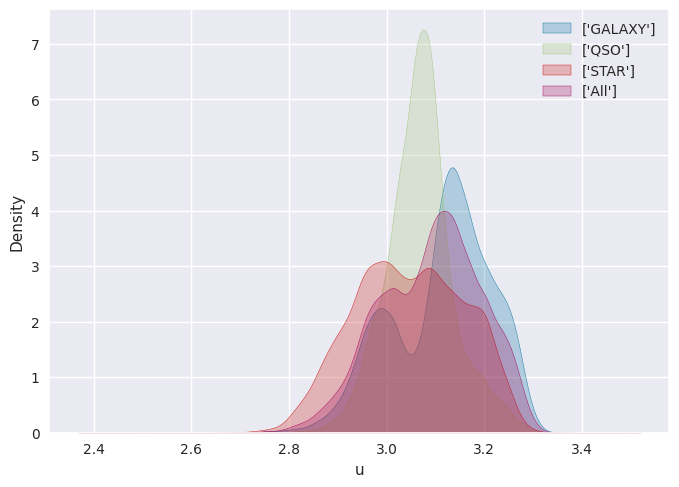

In [ ]:
log_plot('u') #normal plots won't be working due to extreme values

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log



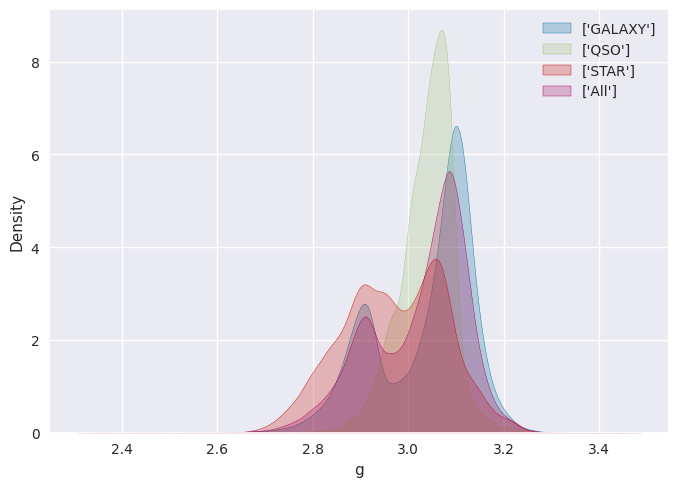

In [ ]:
log_plot('g')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log



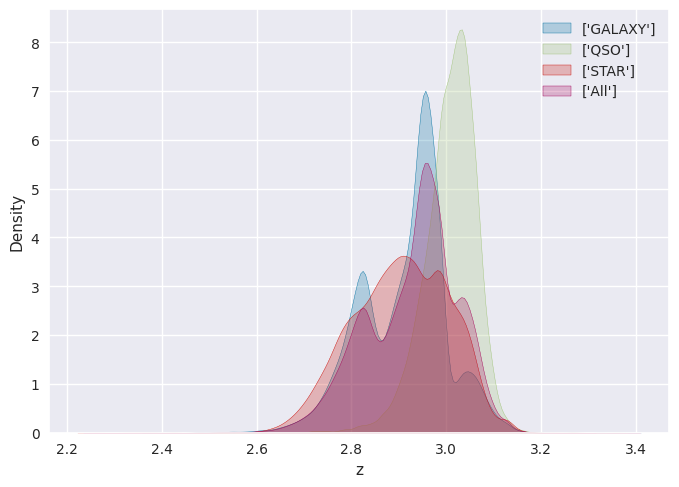

In [ ]:
log_plot('z')

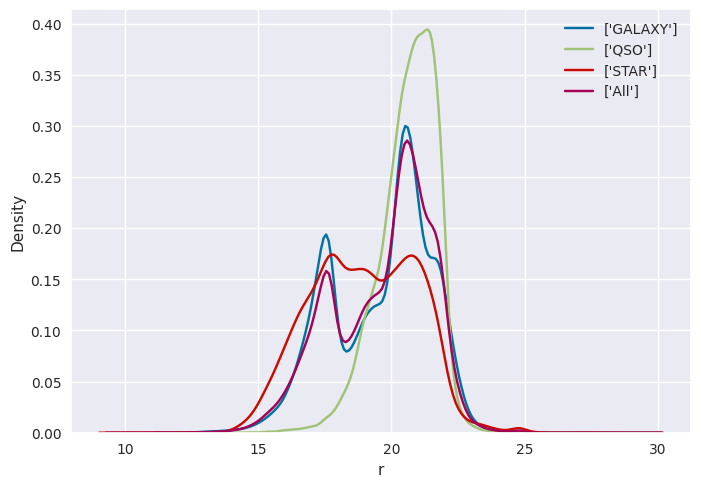

In [ ]:
plot('r')

In [ ]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  cam_col  field_ID   spec_obj_ID  class  \
0  19.16573  18.79371    3606        2        79  6.543777e+18      0   
1  21.16812  21.61427    4518        5       119  1.176014e+19      0   
2  19.34857  18.94827    3606        2       120  5.152200e+18      0   
3  20.50454  19.25010    4192        3       214  1.030107e+19      0   
4  15.97711  15.54461    8102        3       137  6.891865e+18      0   

   redshift  plate    MJD  fiber_ID  
0  0.634794   5812  56354       171  
1  0.779136  10445  58158       427  
2  0.644195   4576  55592       299  
3  0.932346   9149  58039       775  
4  0.116123   6121  56187       842

In [ ]:
corr = df.corr()
corr["class"].sort_values()

r             -0.076766
redshift      -0.054239
fiber_ID      -0.041586
run_ID        -0.036014
obj_ID        -0.036012
field_ID      -0.034833
u             -0.024645
g             -0.020066
alpha         -0.011756
spec_obj_ID   -0.010060
plate         -0.010060
z             -0.001614
MJD           -0.000405
delta          0.014452
i              0.015028
cam_col        0.023138
class          1.000000
Name: class, dtype: float64

In [6]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 59445, 2: 21594, 1: 18961})
Resampled dataset shape Counter({0: 59445, 1: 59445, 2: 59445})


<ipython-input-35-3637f11cf8ea>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: ylabel='count'>

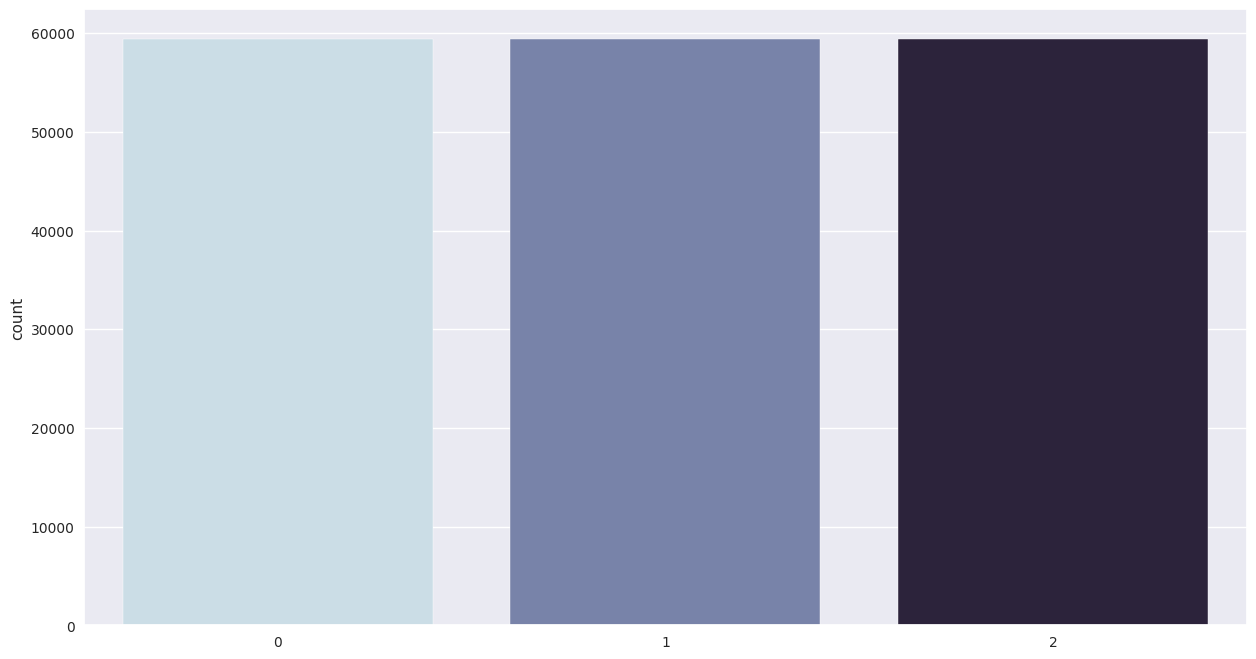

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x=y, palette = 'ch:s=.25,rot=-.25')

In [7]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# **Feature Selection**

In [8]:
X = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD']]
X

alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   

              z  redshift  plate    MJD  
0      18.79371  0.634794   5812  56354  
1      21.61427  0.779136  10445  58158  
2      18.94827  0.644195   4576  55592  
3      19.25010  0.932346   9149  58039  
4      15.54461  0.116123   6121  56187  
...         ...       ...    ...    ...  
99995  20.73569  0.000000   9374  57749  
99996  19.41526  0.404895   7626  56934  
99997  17.35221  0.143366   2764  54535  
99998  18.62482  0.455040   6751  56368  
99999  19.28075  0.542944   7410  57104  

[100000 rows x 10 columns]

In [9]:
y = df['class']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 30)

# **Random Forest Classifier**

In [11]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train,y_train)
predicted = r_forest.predict(X_test)
score = r_forest.score(X_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.980


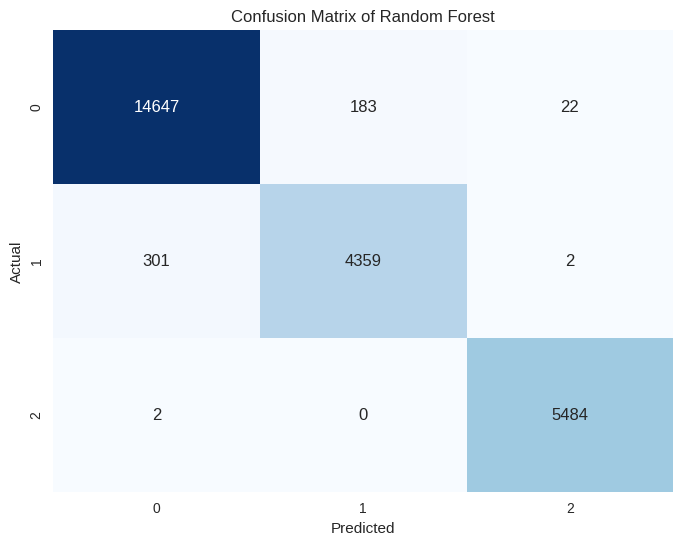

In [12]:
conf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=r_forest.classes_, yticklabels=r_forest.classes_)
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14852
           1       0.96      0.94      0.95      4662
           2       1.00      1.00      1.00      5486

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000



# **XGBoost Classifier**

In [14]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
predicted = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9792


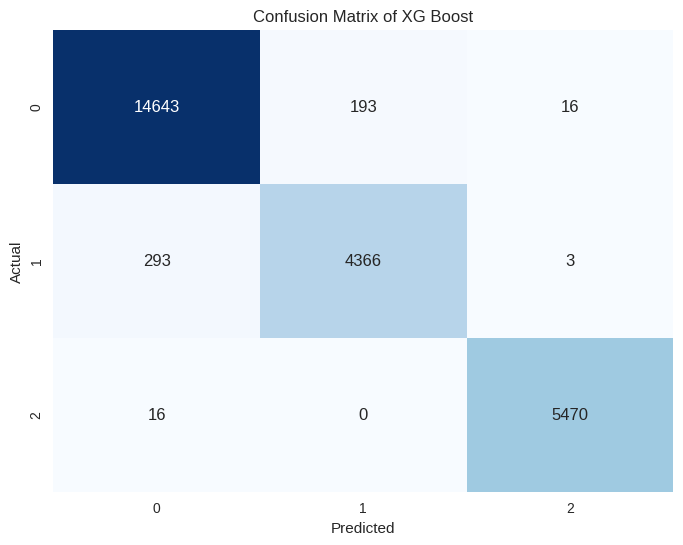

In [15]:
conf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_classifier.classes_, yticklabels=xgb_classifier.classes_)
plt.title('Confusion Matrix of XG Boost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14852
           1       0.96      0.94      0.95      4662
           2       1.00      1.00      1.00      5486

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000



# **Decision Tree Classifier**


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier()

# Defining the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_model = grid_search.best_estimator_
predicted = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.4f}")


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9754


Accuracy with pre-pruned tree: 0.9510


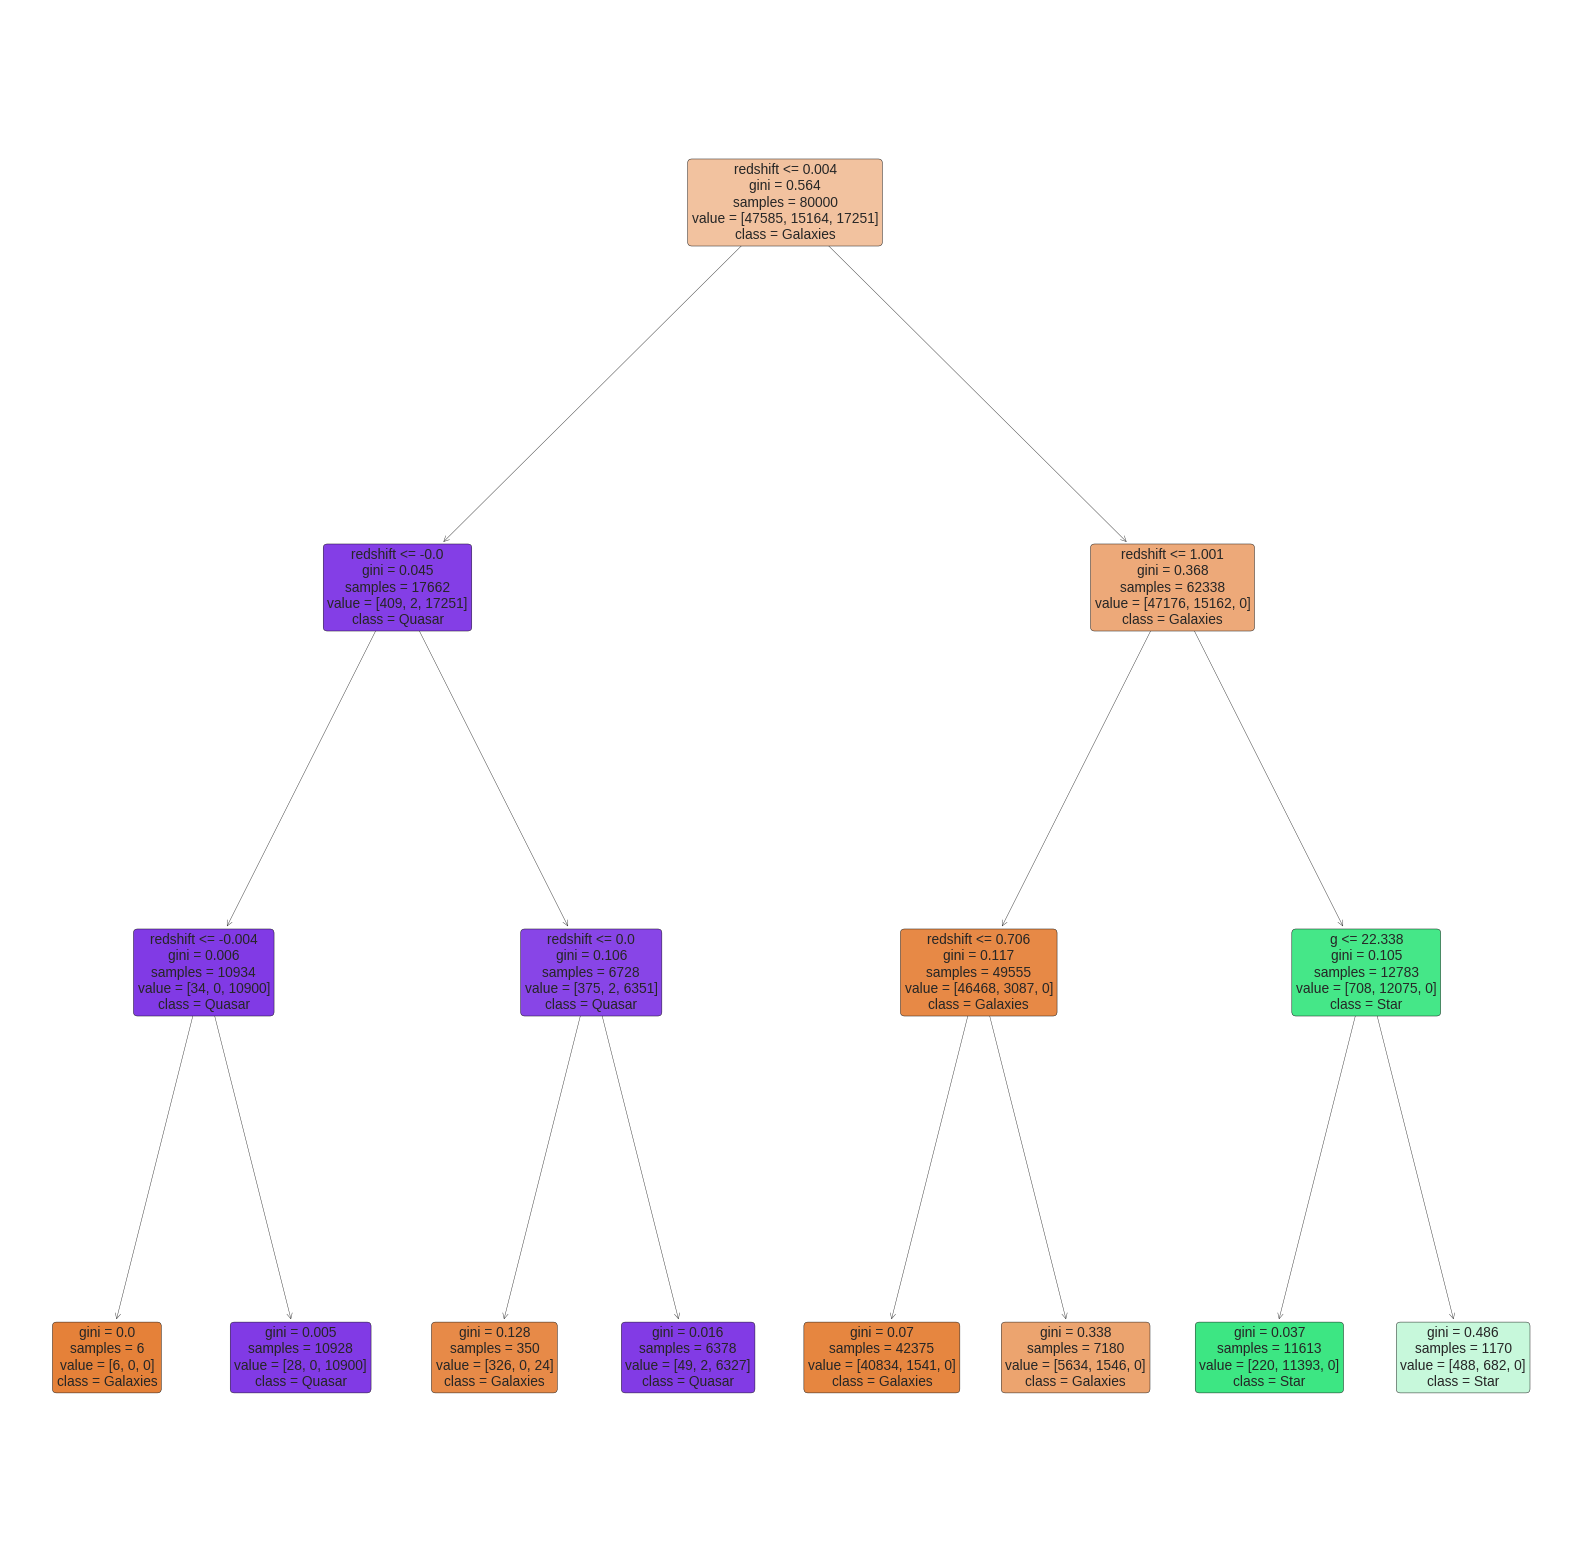

In [19]:
from sklearn.tree import plot_tree
pre_pruned_tree = DecisionTreeClassifier(max_depth=3)
pre_pruned_tree.fit(X_train, y_train)

# Make predictions on the test set
predicted = pre_pruned_tree.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy with pre-pruned tree: {accuracy:.4f}")

# Visualize the pre-pruned tree
plt.figure(figsize=(20, 20))
plot_tree(pre_pruned_tree, feature_names=X.columns, class_names=classes, filled=True, rounded=True)
plt.show()

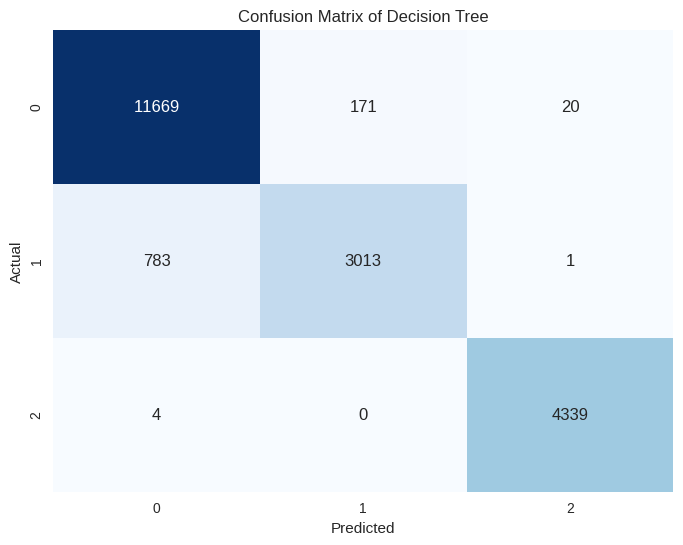

In [20]:
conf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     11860
           1       0.95      0.79      0.86      3797
           2       1.00      1.00      1.00      4343

    accuracy                           0.95     20000
   macro avg       0.96      0.93      0.94     20000
weighted avg       0.95      0.95      0.95     20000



# **Bagging Classifier**

In [22]:
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
predicted = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9781


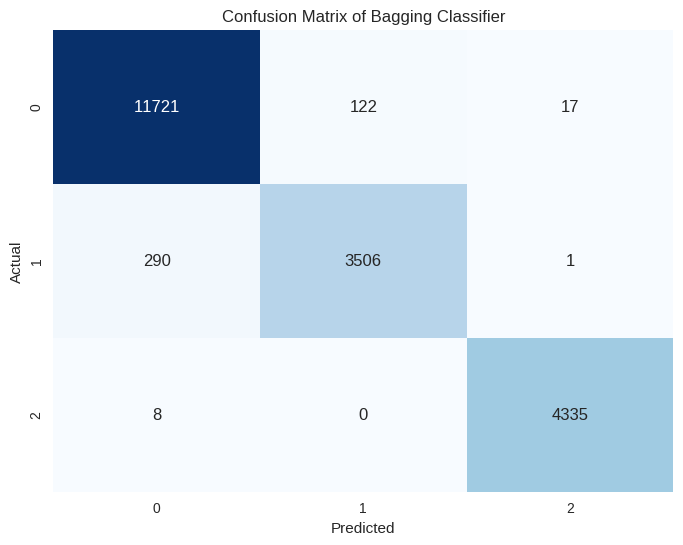

In [23]:
conf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=bagging_classifier.classes_, yticklabels=bagging_classifier.classes_)
plt.title('Confusion Matrix of Bagging Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11860
           1       0.97      0.92      0.94      3797
           2       1.00      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



# **K-means Clustering**

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Cluster Assignments:")
print(labels[:10])
print("Cluster Centers:")
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Assignments:
[0 1 0 1 0 0 1 0 0 2]
Cluster Centers:
[[1.90480059e+02 2.37803380e+01 2.27788528e+01 2.10095118e+01
  2.00401269e+01 1.93691407e+01 1.87765207e+01 6.20544276e-01
  5.08885497e+03 5.58557422e+04]
 [1.64969415e+02 2.65117230e+01 2.26672463e+01 2.18161964e+01
  2.10107361e+01 2.04488242e+01 2.01139892e+01 9.24276076e-01
  8.75576477e+03 5.75943725e+04]
 [1.72900417e+02 2.22653519e+01 2.02324299e+01 1.86223032e+01
  1.77698179e+01 1.73574461e+01 1.70979182e+01 1.74713542e-01
  1.62951945e+03 5.32508130e+04]]


In [26]:
km=KMeans(n_clusters=3)
#fitting the model
#we are using all the columns in here
y_predicted=km.fit_predict(df[[ 'delta', 'redshift']])
#appending the predictions to original dataset
df['cluster']=y_predicted
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

   class  redshift  plate    MJD  fiber_ID  cluster  
0      0  0.634794   5812  56354       171        2  
1      0  0.779136  10445  58158       427        2  
2      0  0.644195   4576  55592       299        2  
3      0  0.932346   9149  58039       775        1  
4      0  0.116123   6121  56187       842        2

<Axes: title={'center': 'Redshift vs Delta'}, xlabel='delta', ylabel='redshift'>

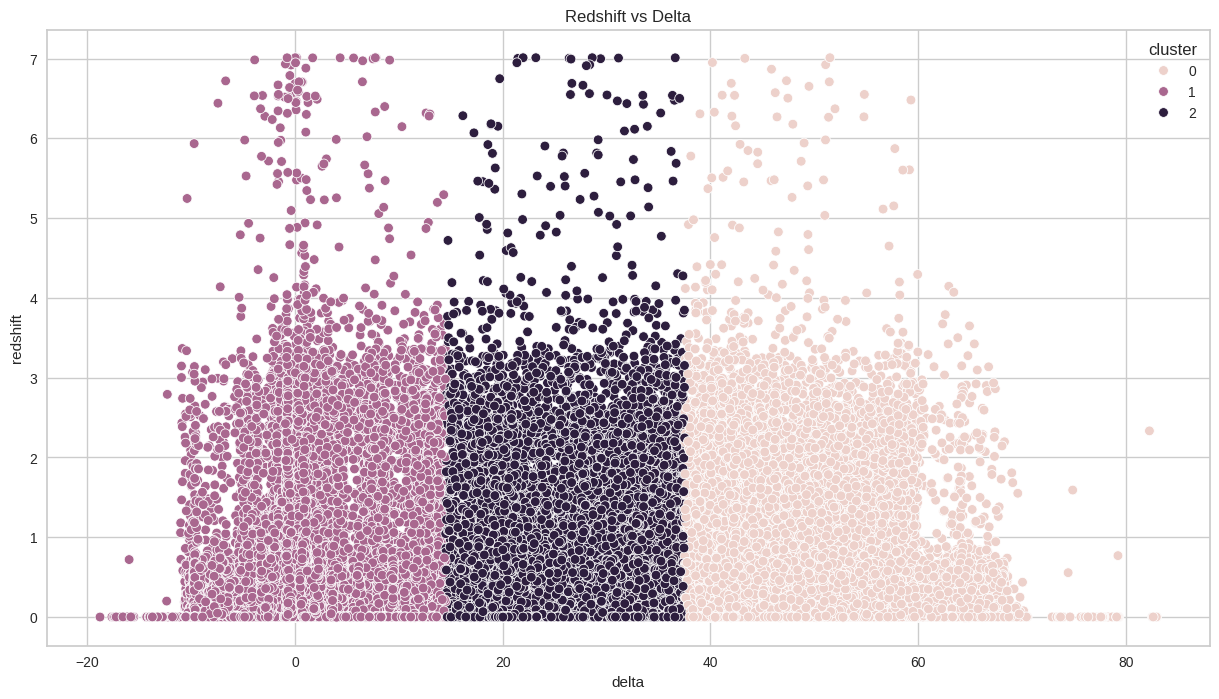

In [27]:
fig, axes = plt.subplots(figsize=(15, 8))
axes.set_title('Redshift vs Delta')
sns.scatterplot(data=df,x='delta', y='redshift', hue='cluster', ax=axes)

The plot suggests that the clusters are not well-defined, indicating that the model may not be effectively capturing the underlying patterns in the data or that the chosen features may not be suitable for forming distinct clusters.

In [28]:
silhouette_avg = silhouette_score(df[[ 'delta', 'redshift']], df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.5875


# **Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) Clustering**

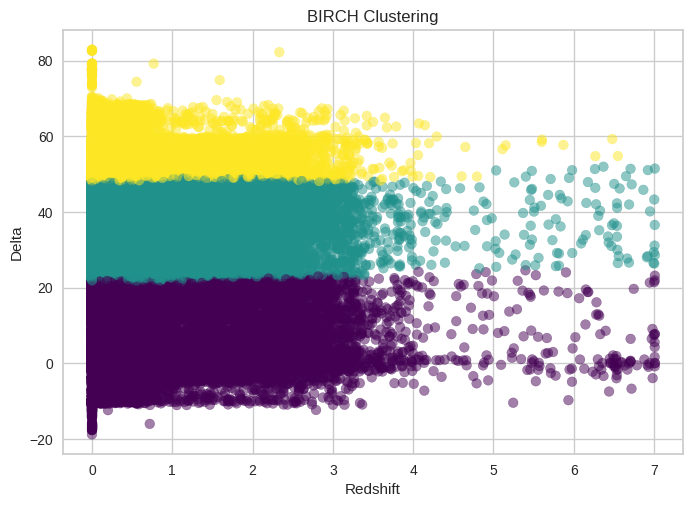

In [29]:
n_clusters = 5
birch = Birch()
birch.fit(df[['redshift','delta']])
labels = birch.labels_
plt.scatter(df['redshift'], df['delta'], c=labels, cmap='viridis', alpha=0.5)
plt.title('BIRCH Clustering')
plt.xlabel('Redshift')
plt.ylabel('Delta')
plt.show()

In [30]:
silhouette_avg = silhouette_score(df[[ 'delta', 'redshift']], labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.5498


# **Implementation of some other classification algorithms**

# **Light GBM**



In [31]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=500, valid_sets=[test_data])

# Make predictions on the test set
predicted = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration).argmax(axis=1)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, predicted))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, predicted)
print(conf_matrix)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 10
[LightGBM] [Info] Start training from score -0.519509
[LightGBM] [Info] Start training from score -1.663102
[LightGBM] [Info] Start training from score -1.534157
Accuracy: 0.9781
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11860
           1       0.96      0.93      0.95      3797
           2       0.99      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

Confusion Matrix:
[[11697   139    24]
 [  265  3531     1]
 [    8     0  4335]]


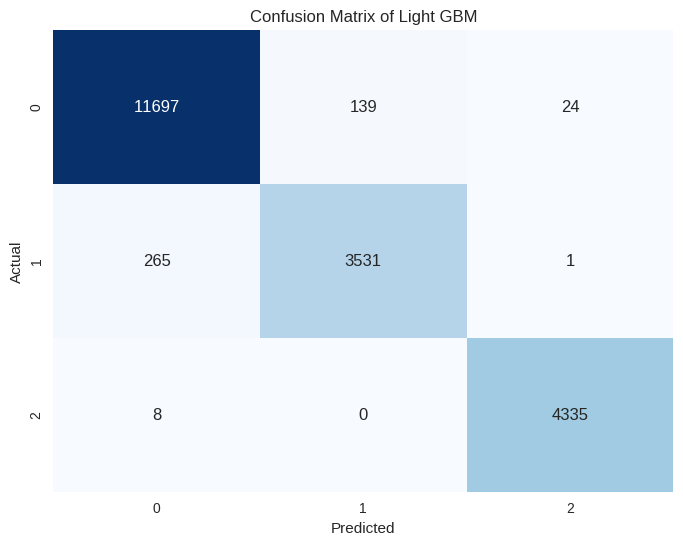

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix of Light GBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Naive-Bayes Classifier**

In [33]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
predicted = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, predicted))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, predicted)
print(conf_matrix)

Accuracy: 0.6888
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79     11860
           1       0.61      0.87      0.72      3797
           2       0.56      0.03      0.05      4343

    accuracy                           0.69     20000
   macro avg       0.63      0.59      0.52     20000
weighted avg       0.66      0.69      0.62     20000

Confusion Matrix:
[[10335  1430    95]
 [  476  3321     0]
 [ 3569   654   120]]


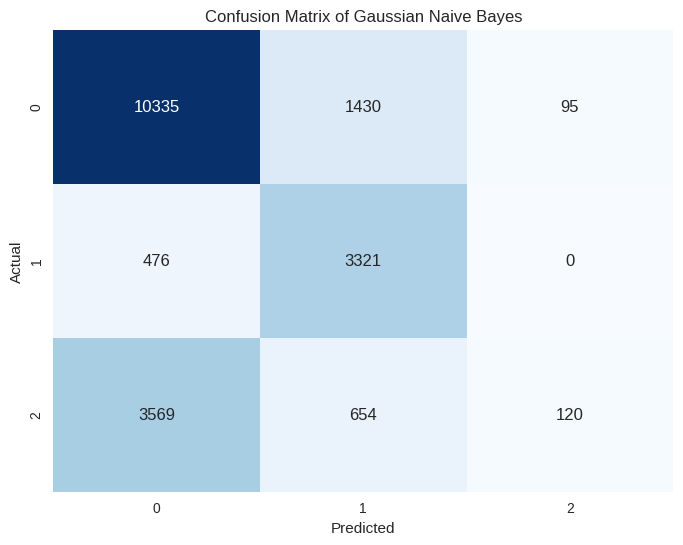

In [34]:
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.title('Confusion Matrix of Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

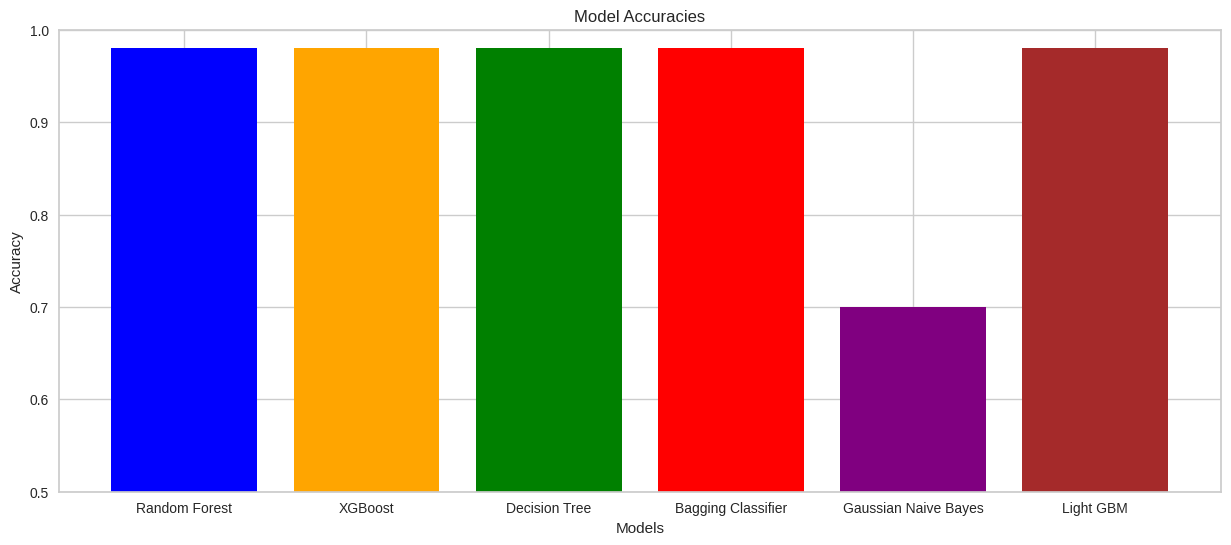

In [35]:
models = ['Random Forest', 'XGBoost', 'Decision Tree', 'Bagging Classifier', 'Gaussian Naive Bayes', 'Light GBM']
accuracies = [0.98, 0.98, 0.98, 0.98, 0.70, 0.98]
plt.figure(figsize=(15, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.ylim(0.5, 1.0)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Random Forest and XGBoost:

Both Random Forest and XGBoost models exhibit high accuracy (around 98%) and excellent precision, recall, and f1-score for each class.
The models perform consistently well across all three classes (0, 1, 2), indicating robust classification capability.

Decision Tree and Bagging Classifier:

Decision Tree and Bagging Classifier also demonstrate high accuracy (around 98%), precision, recall, and f1-score for each class.
These models, however, seem to perform slightly less well compared to Random Forest and XGBoost.
Decision Tree and Bagging Classifier can still be considered suitable for the task, especially if computational resources are a concern.

Gaussian Naive Bayes:

Gaussian Naive Bayes shows lower accuracy (around 70%) and relatively lower precision, recall, and f1-score for each class compared to tree-based models.
It may not be as effective for this task, especially when dealing with imbalanced classes.
Gaussian Naive Bayes might benefit from additional feature engineering or tuning, and its performance may be limited in scenarios with complex relationships between features.

Light GBM:

Light GBM exhibits high accuracy (around 98%) and excellent precision, recall, and f1-score for each class, comparable to Random Forest and XGBoost.
Light GBM is suitable for this classification task and is known for its efficiency and speed, especially on large datasets.